<a href="https://colab.research.google.com/github/SergioaA64/SergioaA64/blob/main/2-TrabalhoEstat%C3%ADstica_MarinaRamos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Trabalho de Estatística Descritiva 
##Marina Ramos Caetano

#Objetivo

O objetivo do presente estudo é investigar a influência de diferentes características sociais e demográficas nas dinâmicas de mortalidade e/ou cura por Covid-19, de modo a propor agenda de pesquisa para atuação no combate à pandemia.

## Dataset

Foram utilizados dados do Sivep gripe, sistema utilizado para registro de Sindromes Respiratórias Agudas. Ressalta-se que o sistema já era utilizado para registro de influenza e outros vírus repiratórios e foi adaptado para monitoramento da infecção respiratória aguda causada pelo coronavírus SARS-CoV-2. O sistema é utilizado para coleta e a notificação de todos os casos de SRAG hospitalizados e/ou óbitos por SRAG, causados por vírus respiratórios de importância em saúde pública. Importante ressaltar que todos os óbitos por SRAG, mesmo os não hospitalizados, devem ser notificados no Sivep-Gripe. 


##Variáveis

A maior parte das variáveis utilizadas são qualitativas, tais como sexo, raça, educação, desfecho do caso e região de procedência dos pacientes que contrairam sídrome respiratória aguda grave. As variáveis quantitativas utilizadas foram idade, número de óbitos e de curados. 

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

Importa dataset

In [ ]:
sivep = pd.read_csv('https://s3-sa-east-1.amazonaws.com/ckan.saude.gov.br/SRAG/2020/INFLUD-23-08-2021.csv', sep=";",low_memory=False, dtype={'CO_MUN_RES':str, 'NU_IDADE_N': int} )

#Limpeza e ajustes nos dados

Seleciona SARS-COV no dataset

In [ ]:
sivep_covid = sivep[(sivep['CLASSI_FIN'] == 5.0)]

In [ ]:
sivep_covid.rename(columns={'CS_RACA':'RAÇA','CS_SEXO':'SEXO', 'EVOLUCAO': "EVOLUÇÃO", "CS_ESCOL_N": "ESCOLARIDADE", "HOSPITAL": "HOSPITALIZADO"}, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
sivep_covid["ESCOLARIDADE"].replace([0, 1.0, 2.0, 3.0, 4.0, 5.0, 9.0 ], ["Analfabeto", "Fundamental-1", "Fundamental-2", "Médio", "Superior","Não se aplica", "Ignorado"], inplace=True)
sivep_covid["SEXO"].replace(["F", "M"], ["Feminino", "Masculino"], inplace=True)
sivep_covid["EVOLUÇÃO"].replace([1.0, 2.0, 3.0, 9.0], ["Cura", "Óbito", "Óbito por outras causas", "Ignorado"], inplace=True)
sivep_covid["RAÇA"].replace([1.0, 2.0, 3.0, 4.0, 5.0, 9. ], ["Branca", "Preta", "Amarela", "Parda", "Indígena", "Ignorado"], inplace=True)
sivep_covid["HOSPITALIZADO"].replace([1.0,02.0,3.0], ["Sim", "Não", "Ignorado"], inplace=True)


/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [ ]:
sivep_covid.replace(['19/05/2502', '22/06/9202', '08/05/2502', '16/04/7202', '11/10/5202'], ['19/05/2020', '22/06/2020', '08/05/2020', '16/04/2020', '11/10/2020'], inplace=True)
sivep_covid.replace(['05/08/4020', '19/11/2929'], ['05/08/2020', '19/11/2020'], inplace=True)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4389: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [ ]:
sivep_covid['Data Saída UTI'] = pd.to_datetime(sivep_covid['DT_SAIDUTI'],  format='%d/%m/%Y')
sivep_covid['Data Desfecho'] = pd.to_datetime(sivep_covid['DT_EVOLUCA'], format='%d/%m/%Y')
sivep_covid['Data Entrada UTI'] = pd.to_datetime(sivep_covid['DT_ENTUTI'], format='%d/%m/%Y')
sivep_covid['Data Internação'] = pd.to_datetime(sivep_covid['DT_INTERNA'],  format='%d/%m/%Y')
sivep_covid['Primeiros Sintomas'] = pd.to_datetime(sivep_covid['DT_SIN_PRI'], format='%d/%m/%Y')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
def determina_regiao(UF):
    if UF in ("DF" , "MS" , "MT" , "GO"):
        return "Centro-Oeste"
    if UF in ( "AC" , "RO" , "PA", "AM", "RR", "AP", "TO"):
        return "Norte"
    if UF in ("BA" , "MA" , "PB" , "PI" , "RN", "CE", "PE", "AL", "SE"):
        return "Nordeste"
    if UF in ( "RS" , "PR" , "SC"):
        return "Sul"
    if UF in ( "SP" , "ES" , "MG" , "RJ"):
        return "Sudeste"
    
sivep_covid["Região"] = sivep_covid.SG_UF_NOT.map(determina_regiao)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [ ]:
bins= [0, 1, 6, 20, 30, 40, 50, 60, 70, 80, 90, 113]
labels = ['<1','1 a 5','6 a 19','20 a 29','30 a 39', '40 a 49', '50 a 59','60 a 69','70 a 79','80 a 89','90 ou mais']
sivep_covid['Grupo de Idade'] = pd.cut(sivep_covid['NU_IDADE_N'], bins=bins, labels=labels, right=False)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
sivep_covid['Dias para desfecho'] = sivep_covid['Data Desfecho'] - sivep_covid['Primeiros Sintomas']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
sivep_covid_2020 = sivep_covid[sivep_covid["Data Desfecho"].dt.year == 2020]
sivep_covid_2021 = sivep_covid[sivep_covid["Data Desfecho"].dt.year == 2021]


In [ ]:
bins= [np.datetime64("2020-01-01"),np.datetime64("2020-01-05"), np.datetime64("2020-01-12"), np.datetime64("2020-01-19"), np.datetime64("2020-01-26"), np.datetime64("2020-02-02"), np.datetime64("2020-02-09"), np.datetime64("2020-02-16"), np.datetime64("2020-02-23"), np.datetime64("2020-03-01"), np.datetime64("2020-03-08"), np.datetime64("2020-03-15"), np.datetime64("2020-03-22"), np.datetime64("2020-03-29"), np.datetime64("2020-04-05"), np.datetime64("2020-04-12"), np.datetime64("2020-04-19"), np.datetime64("2020-04-26"), np.datetime64("2020-05-03"), np.datetime64("2020-05-10"), np.datetime64("2020-05-17"), np.datetime64("2020-05-24"), np.datetime64("2020-05-31"), np.datetime64("2020-06-07"), np.datetime64("2020-06-14"), np.datetime64("2020-06-21"), np.datetime64("2020-06-28"), np.datetime64("2020-07-05"), np.datetime64("2020-07-12"), np.datetime64("2020-07-19"), np.datetime64("2020-07-26"), np.datetime64("2020-08-02"), np.datetime64("2020-08-09"), np.datetime64("2020-08-16"), np.datetime64("2020-08-23"), np.datetime64("2020-08-30"), np.datetime64("2020-09-06"), np.datetime64("2020-09-13"), np.datetime64("2020-09-20"), np.datetime64("2020-09-27"), np.datetime64("2020-10-04"), np.datetime64("2020-10-11"), np.datetime64("2020-10-18"), np.datetime64("2020-10-25"), np.datetime64("2020-11-01"), np.datetime64("2020-11-08"), np.datetime64("2020-11-15"), np.datetime64("2020-11-22"), np.datetime64("2020-11-29"), np.datetime64("2020-12-06"), np.datetime64("2020-12-13"), np.datetime64("2020-12-20"), np.datetime64("2020-12-27"), np.datetime64("2021-01-03")]
labels = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53]
sivep_covid_2020['Semana desfecho'] = pd.cut(sivep_covid_2020['Data Desfecho'], bins=bins, labels=labels, right=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
bins= [np.datetime64("2021-01-03"), np.datetime64("2021-01-10"), np.datetime64("2021-01-17"), np.datetime64("2021-01-24"), np.datetime64("2021-01-31"), np.datetime64("2021-02-07"), np.datetime64("2021-02-14"), np.datetime64("2021-02-21"), np.datetime64("2021-02-28"), np.datetime64("2021-03-07"), np.datetime64("2021-03-14"), np.datetime64("2021-03-21"), np.datetime64("2021-03-28"), np.datetime64("2021-04-04"), np.datetime64("2021-04-11"), np.datetime64("2021-04-18"), np.datetime64("2021-04-25"), np.datetime64("2021-05-02"), np.datetime64("2021-05-09"), np.datetime64("2021-05-16"), np.datetime64("2021-05-23"), np.datetime64("2021-05-30"), np.datetime64("2021-06-06"), np.datetime64("2021-06-13"), np.datetime64("2021-06-20"), np.datetime64("2021-06-27"), np.datetime64("2021-07-04"), np.datetime64("2021-07-11"), np.datetime64("2021-07-18"), np.datetime64("2021-07-25"), np.datetime64("2021-08-01"), np.datetime64("2021-08-08"), np.datetime64("2021-08-15"), np.datetime64("2021-08-22"), np.datetime64("2021-08-29"), np.datetime64("2021-09-05"), np.datetime64("2021-09-12"), np.datetime64("2021-09-19"), np.datetime64("2021-09-26"), np.datetime64("2021-10-03"), np.datetime64("2021-10-10"), np.datetime64("2021-10-17"), np.datetime64("2021-10-24"), np.datetime64("2021-10-31"), np.datetime64("2021-11-07"), np.datetime64("2021-11-14"), np.datetime64("2021-11-21"), np.datetime64("2021-11-28"), np.datetime64("2021-12-05"), np.datetime64("2021-12-12"), np.datetime64("2021-12-19"), np.datetime64("2021-12-26"), np.datetime64("2022-01-02")]
labels = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52]
sivep_covid_2021['Semana desfecho'] = pd.cut(sivep_covid_2021['Data Desfecho'], bins=bins, labels=labels, right=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


##Tamanho do dataset

In [ ]:
print(f'Quantidade de registros de SARS-COV em 2020: {sivep_covid_2020.shape[0]}')

Quantidade de registros de SARS-COV em 2020: 566007


Seleção dos casos de óbito e verificação do tamanho do dataset

In [ ]:
sivep_covid_obito_2020 = sivep_covid_2020[(sivep_covid_2020['EVOLUÇÃO'] == "Óbito")]
sivep_covid_obito_2021 = sivep_covid_2021[(sivep_covid_2021['EVOLUÇÃO'] == "Óbito")]

In [ ]:
print(f'Quantidade de registros de SARS-COV com desfecho de óbito em 2020: {sivep_covid_obito_2020.shape[0]}')

Quantidade de registros de SARS-COV com desfecho de óbito em 2020: 203279


#Cálculo de estatísticas descritivas

##Idade média dos pacientes por tipo de evolução

In [ ]:
print(f"Idade média dos pacientes SARS-COV: {round(sivep_covid_2020['NU_IDADE_N'].mean(),2)}")
print(f"Idade média dos pacientes SARS-COV por tipo de {round(sivep_covid_2020.groupby('EVOLUÇÃO')['NU_IDADE_N'].mean(),2)}")
print(f"Estatísticas de idade dos pacientes SARS-COV: {round(sivep_covid_2020['NU_IDADE_N'].describe(),2)}")


Idade média dos pacientes SARS-COV: 59.82
Idade média dos pacientes SARS-COV por tipo de EVOLUÇÃO
Cura                       54.60
Ignorado                   85.00
Óbito                      69.07
Óbito por outras causas    62.50
Name: NU_IDADE_N, dtype: float64
Estatísticas de idade dos pacientes SARS-COV: count    566007.00
mean         59.82
std          18.67
min          -1.00
25%          47.00
50%          61.00
75%          74.00
max         148.00
Name: NU_IDADE_N, dtype: float64


In [ ]:
print(round(sivep_covid_obito_2020.groupby('SG_UF')['NU_IDADE_N'].mean(),2).sort_values().tail(3))
print(sivep_covid_obito_2020.groupby('Região')['NU_IDADE_N'].mean())

SG_UF
CE    70.36
RS    70.79
MG    71.07
Name: NU_IDADE_N, dtype: float64
Região
Centro-Oeste    68.058340
Nordeste        68.885555
Norte           66.900218
Sudeste         69.560041
Sul             69.889016
Name: NU_IDADE_N, dtype: float64


##Tempo médio para desfecho do caso

In [ ]:
print(sivep_covid_2020.groupby('Grupo de Idade')['Dias para desfecho'].mean(numeric_only=False))

Grupo de Idade
<1           15 days 22:47:08.571428571
1 a 5        13 days 10:24:28.935821201
6 a 19       14 days 22:47:37.870690848
20 a 29      16 days 04:39:04.252389678
30 a 39      16 days 13:27:14.839310666
40 a 49      17 days 05:45:05.184874829
50 a 59      18 days 09:45:42.713687985
60 a 69      19 days 01:00:12.729582203
70 a 79      18 days 18:32:00.018771264
80 a 89      17 days 03:22:46.336633663
90 ou mais   15 days 06:09:48.203133214
Name: Dias para desfecho, dtype: timedelta64[ns]


In [ ]:
print(sivep_covid_2020.groupby('HOSPITALIZADO')['Dias para desfecho'].mean(numeric_only=False))

HOSPITALIZADO
9.0   13 days 20:09:15.180722891
Não   13 days 04:06:51.263846256
Sim   18 days 01:58:04.938090379
Name: Dias para desfecho, dtype: timedelta64[ns]


In [ ]:
sivep_covid_2020['Dias para desfecho'].mean(numeric_only=False)

Timedelta('17 days 20:29:56.136090119')

In [ ]:
print(sivep_covid_2020.groupby('EVOLUÇÃO')['Dias para desfecho'].mean(numeric_only=False))

EVOLUÇÃO
Cura                      17 days 19:30:09.973279430
Ignorado                             1 days 00:00:00
Óbito                     17 days 19:24:05.018914890
Óbito por outras causas   33 days 06:01:22.129277566
Name: Dias para desfecho, dtype: timedelta64[ns]


##Gráficos

Text(0.5, 1.0, 'Evolução do caso entre homens e mulheres')

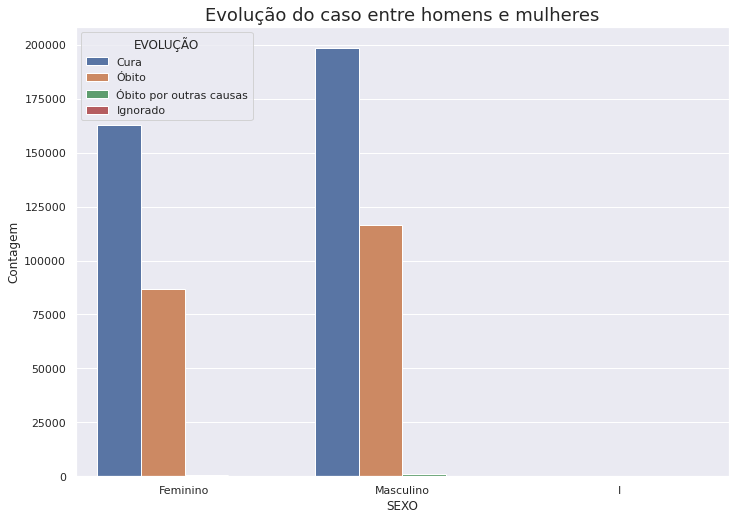

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
fig , ax = plt.subplots()
sns.countplot(x="SEXO", hue= 'EVOLUÇÃO', data=sivep_covid_2020)
ax.set_ylabel("Contagem")
ax.set_title("Evolução do caso entre homens e mulheres", fontsize=18)

Text(0.5, 1.0, 'Evolução do caso por raça')

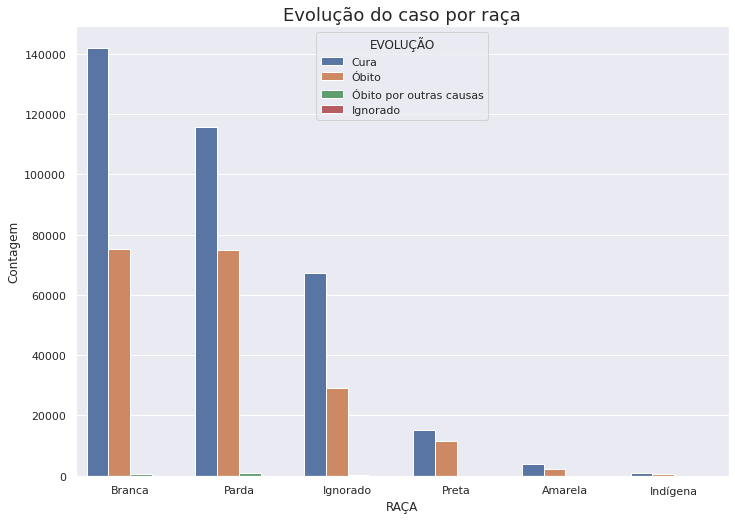

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
fig , ax = plt.subplots()
sns.countplot(x="RAÇA", hue= 'EVOLUÇÃO', data=sivep_covid_2020)
ax.set_ylabel("Contagem")
ax.set_title("Evolução do caso por raça", fontsize=18)


Text(0.5, 1.0, 'Evolução do caso por escolaridade')

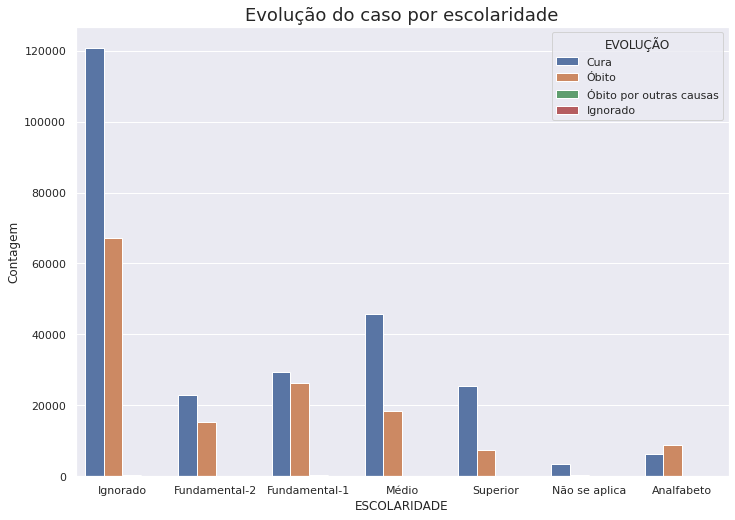

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
fig , ax = plt.subplots()
sns.countplot(x="ESCOLARIDADE", hue= 'EVOLUÇÃO', data=sivep_covid_2020)
ax.set_ylabel("Contagem")
ax.set_title("Evolução do caso por escolaridade", fontsize=18)

Text(0.5, 1.0, 'Evolução do caso por grupo de idade')

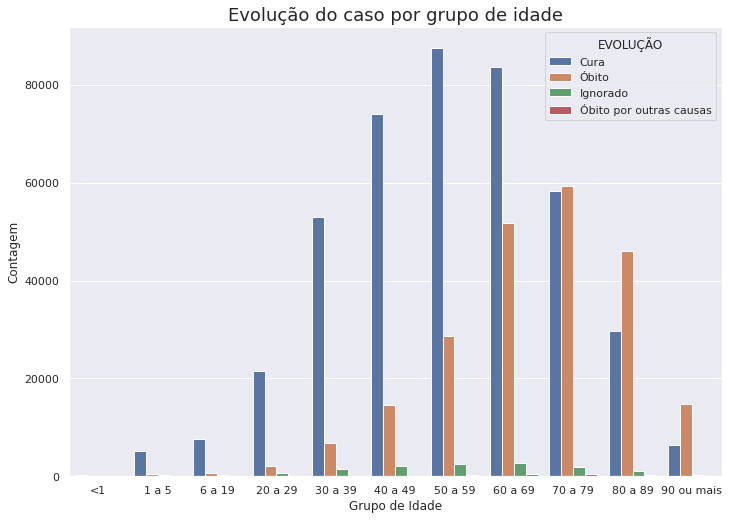

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
fig , ax = plt.subplots()
sns.countplot(x="Grupo de Idade", hue= 'EVOLUÇÃO', data=sivep_covid)
ax.set_ylabel("Contagem")
ax.set_title("Evolução do caso por grupo de idade", fontsize=18)

Text(0.5, 1.0, 'Evolução do caso região')

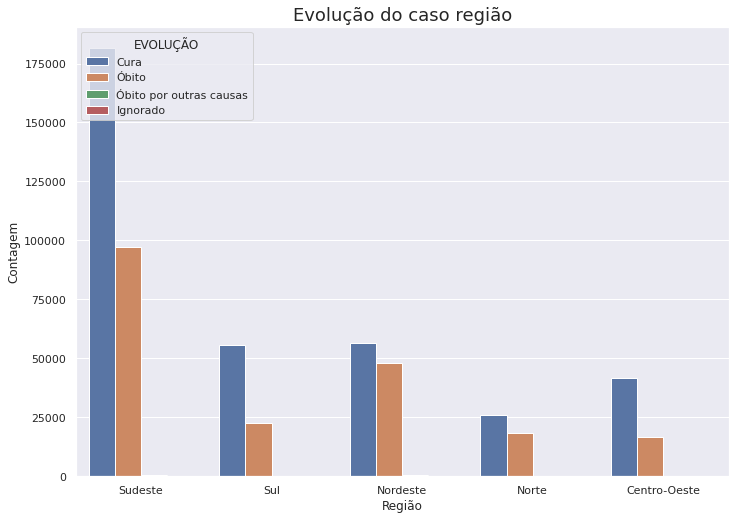

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
fig , ax = plt.subplots()
sns.countplot(x="Região", hue= 'EVOLUÇÃO', data=sivep_covid_2020)
ax.set_ylabel("Contagem")
ax.set_title("Evolução do caso região", fontsize=18)

##Cálculo de indicadores agrupados por região e UF

In [ ]:
grouped_2020_uf = sivep_covid_2020.groupby(["SG_UF", "Semana desfecho", "EVOLUÇÃO"]).size().reset_index(name='counts')
g4 = grouped_2020_uf[grouped_2020_uf["EVOLUÇÃO"]=='Cura']
g4['Curados'] = g4['counts'].astype(int)
g5 = grouped_2020_uf[grouped_2020_uf["EVOLUÇÃO"]=='Óbito']
g5['Óbitos'] = g5['counts'].astype(int)
merged2 = pd.merge(g4,g5, on=["SG_UF", "Semana desfecho"])
merged2['Perc_cura'] = (merged2['Óbitos']/merged2['Curados'])*100
merged2["Total"] = merged2['Óbitos']+ merged2['Curados']
merged2['Perc_casos_letais'] = (merged2['Óbitos']/merged2['Total'])*100
merged_uf = merged2.sort_values(by="Perc_casos_letais",ascending=False)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


Text(0.5, 1.0, 'Proporção média de casos letais por unidade da federação')

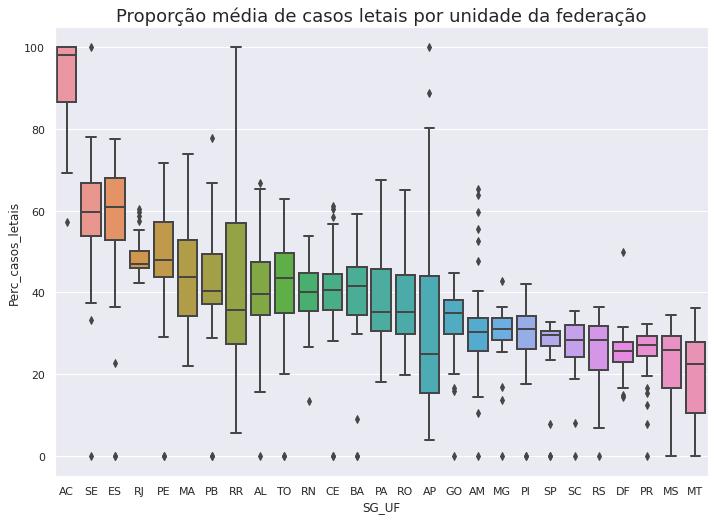

In [ ]:
grouped = merged_uf["Perc_casos_letais"].groupby(merged_uf['SG_UF']).mean().sort_values(ascending=False)
fig , ax = plt.subplots()
sns.boxplot(x="SG_UF", y="Perc_casos_letais", data=merged_uf, linewidth=2, order=grouped.index)
ax.set_title("Proporção média de casos letais por unidade da federação", fontsize=18)


In [ ]:
grouped_2020 = sivep_covid_2020.groupby(["Região","Semana desfecho", "EVOLUÇÃO"]).size().reset_index(name='counts')
g2 = grouped_2020[grouped_2020["EVOLUÇÃO"]=='Cura']
g2['Curados'] = g2['counts'].astype(int)
g3 = grouped_2020[grouped_2020["EVOLUÇÃO"]=='Óbito']
g3['Óbitos'] = g3['counts'].astype(int)
merged = pd.merge(g2,g3, on=["Região","Semana desfecho"])
merged['Perc_cura'] = (merged['Óbitos']/merged['Curados'])*100
merged["Total"] = merged['Óbitos']+ merged['Curados']
merged['Perc_casos_letais'] = (merged['Óbitos']/merged['Total'])*100


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


Text(0.5, 1.0, 'Proporção média de casos letais por região por semana epidemiológica')

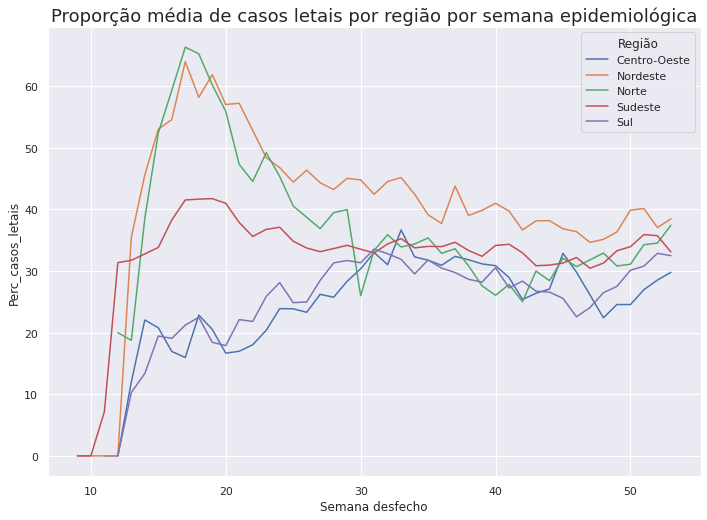

In [ ]:
fig , ax = plt.subplots()
sns.lineplot(data=merged, x="Semana desfecho", y="Perc_casos_letais", hue="Região")
ax.set_title("Proporção média de casos letais por região por semana epidemiológica", fontsize=18)


Text(0.5, 1.0, 'Quantidade de casos por região por semana epidemiológica')

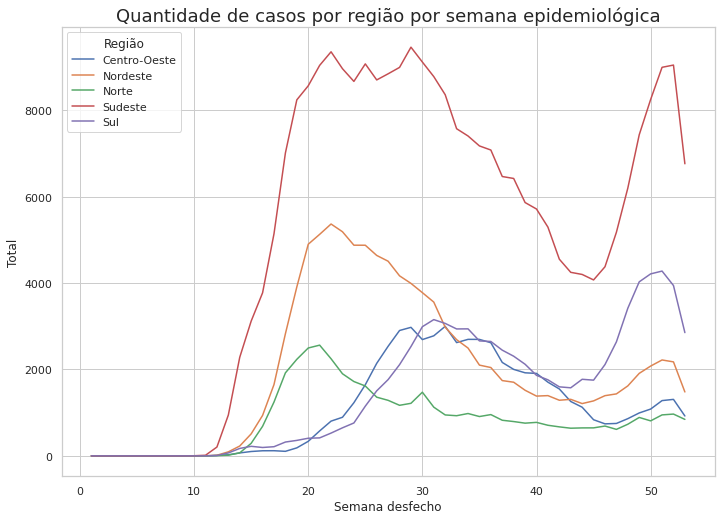

In [ ]:
fig , ax = plt.subplots()
sns.lineplot(data=merged, x ="Semana desfecho", y="Total", hue="Região")
ax.set_title("Quantidade de casos por região por semana epidemiológica", fontsize=18)

In [ ]:
tabela = pd.crosstab(sivep_covid_2020.EVOLUÇÃO,sivep_covid_2020.Região)
tabela

Região,Centro-Oeste,Nordeste,Norte,Sudeste,Sul
EVOLUÇÃO,,,,,
Cura,41610,56436,25954,181521,55624
Ignorado,0,0,0,1,0
Óbito,16661,48119,18360,97334,22805
Óbito por outras causas,230,450,335,397,166


In [ ]:
grouped_2020_uf_2 = sivep_covid_2020.groupby(["SG_UF", "EVOLUÇÃO"]).size().reset_index(name='counts')
g6 = grouped_2020_uf_2[grouped_2020_uf_2["EVOLUÇÃO"]=='Cura']
g6['Curados'] = g6['counts'].astype(int)
g7 = grouped_2020_uf_2[grouped_2020_uf_2["EVOLUÇÃO"]=='Óbito']
g7['Óbitos'] = g7['counts'].astype(int)
merged3 = pd.merge(g6,g7, on=["SG_UF"])
merged3['Perc_cura'] = (merged3['Óbitos']/merged3['Curados'])*100
merged3["Total"] = merged3['Óbitos']+ merged3['Curados']
merged3["Total_per_1000"] = merged3["Total"]/1000
merged3["Óbitos_per_1000"] = merged3["Óbitos"]/1000
merged3.sort_values(by="Total_per_1000",inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


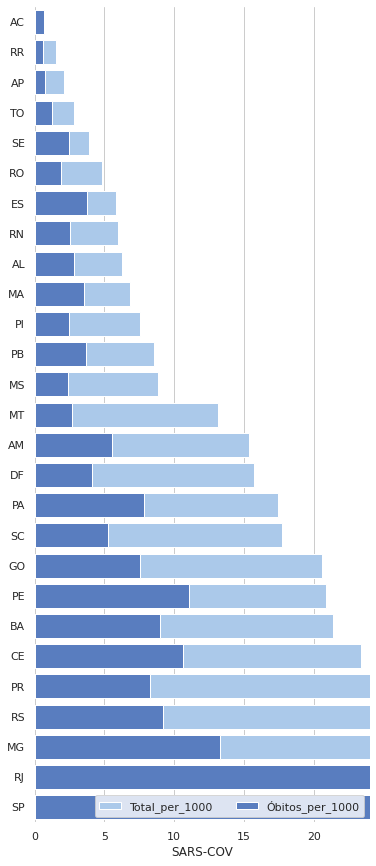

In [ ]:
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="Total_per_1000", y="SG_UF", data=merged3,
            label="Total_per_1000", color="b")

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x="Óbitos_per_1000", y="SG_UF", data=merged3,
            label="Óbitos_per_1000", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 24), ylabel="",
       xlabel="SARS-COV")
sns.despine(left=True, bottom=True)

##Proporção de pacientes com comorbidades

In [ ]:
sivep_covid_2020_morb = sivep_covid_2020[(sivep_covid_2020['CARDIOPATI'].notnull())& (sivep_covid_2020['HEMATOLOGI'].notnull()) & (sivep_covid_2020['HEPATICA'].notnull()) & (sivep_covid_2020['CARDIOPATI'].notnull())&(sivep_covid_2020['ASMA'].notnull()) &(sivep_covid_2020['DIABETES'].notnull()) & (sivep_covid_2020['NEUROLOGIC'].notnull())& (sivep_covid_2020['PNEUMOPATI'].notnull())& (sivep_covid_2020['IMUNODEPRE'].notnull()) & (sivep_covid_2020['RENAL'].notnull())& (sivep_covid_2020['OBESIDADE'].notnull())& (sivep_covid_2020['OUT_MORBI'].notnull())]
print(f"Proporção de pacientes com Doença Cardiovascular Crônica: {round(sivep_covid_2020_morb[sivep_covid_2020_morb['CARDIOPATI'] == 1.0].shape[0] /sivep_covid_2020_morb.shape[0],2)}")
print(f"Proporção de pacientes com Doença Hematológica Crônica: {round(sivep_covid_2020_morb[sivep_covid_2020_morb['HEMATOLOGI'] == 1.0].shape[0] /sivep_covid_2020_morb.shape[0],2)}")
print(f"Proporção de pacientes com Doença Hepática Crônica: {round(sivep_covid_2020_morb[sivep_covid_2020_morb['HEPATICA'] == 1.0].shape[0] /sivep_covid_2020_morb.shape[0],2)}")
print(f"Proporção de pacientes com Asma: {round(sivep_covid_2020_morb[sivep_covid_2020_morb['ASMA'] == 1.0].shape[0] /sivep_covid_2020_morb.shape[0],2)}")
print(f"Proporção de pacientes com Diabetes mellitus: {round(sivep_covid_2020_morb[sivep_covid_2020_morb['DIABETES'] == 1.0].shape[0] /sivep_covid_2020_morb.shape[0],2)}")
print(f"Proporção de pacientes com Doença Neurológica: {round(sivep_covid_2020_morb[sivep_covid_2020_morb['NEUROLOGIC'] == 1.0].shape[0] /sivep_covid_2020_morb.shape[0],2)}")
print(f"Proporção de pacientes com pneumopatia crônica: {round(sivep_covid_2020_morb[sivep_covid_2020_morb['CARDIOPATI'] == 1.0].shape[0] /sivep_covid_2020_morb.shape[0],2)}")
print(f"Proporção de pacientes com Imunodeficiência: {round(sivep_covid_2020_morb[sivep_covid_2020_morb['IMUNODEPRE'] == 1.0].shape[0] /sivep_covid_2020_morb.shape[0],2)}")
print(f"Proporção de pacientes com Doença Renal Crônica: {round(sivep_covid_2020_morb[sivep_covid_2020_morb['RENAL'] == 1.0].shape[0] /sivep_covid_2020_morb.shape[0],2)}")
print(f"Proporção de pacientes com obesidade: {round(sivep_covid_2020_morb[sivep_covid_2020_morb['OBESIDADE'] == 1.0].shape[0] /sivep_covid_2020_morb.shape[0],2)}")
print(f"Proporção de pacientes com outros fatores de risco: {round(sivep_covid_2020_morb[sivep_covid_2020_morb['OUT_MORBI'] == 1.0].shape[0] /sivep_covid_2020_morb.shape[0],2)}")



Proporção de pacientes com Doença Cardiovascular Crônica: 0.53
Proporção de pacientes com Doença Hematológica Crônica: 0.01
Proporção de pacientes com Doença Hepática Crônica: 0.02
Proporção de pacientes com Asma: 0.04
Proporção de pacientes com Diabetes mellitus: 0.39
Proporção de pacientes com Doença Neurológica: 0.07
Proporção de pacientes com pneumopatia crônica: 0.53
Proporção de pacientes com Imunodeficiência: 0.05
Proporção de pacientes com Doença Renal Crônica: 0.07
Proporção de pacientes com obesidade: 0.1
Proporção de pacientes com outros fatores de risco: 0.45


In [ ]:
sivep_covid_2020_alg_morb = sivep_covid_2020[(sivep_covid_2020['CARDIOPATI']== 1.0) | (sivep_covid_2020['HEMATOLOGI']== 1.0) | (sivep_covid_2020['HEPATICA']== 1.0) | (sivep_covid_2020['CARDIOPATI']== 1.0) | (sivep_covid_2020['ASMA']== 1.0) | (sivep_covid_2020['DIABETES']== 1.0) | (sivep_covid_2020['NEUROLOGIC']== 1.0) | (sivep_covid_2020['PNEUMOPATI']== 1.0) | (sivep_covid_2020['IMUNODEPRE']== 1.0) | (sivep_covid_2020['RENAL']== 1.0) | (sivep_covid_2020['OBESIDADE']== 1.0) | (sivep_covid_2020['OUT_MORBI']== 1.0)]
sivep_covid_2020_alg_morb.shape[0]/sivep_covid_2020.shape[0]

0.6430397503917796

##Identificação de sintomas mais comuns

In [ ]:
sivep_covid_2020_morb = sivep_covid_2020[(sivep_covid_2020['FEBRE'].notnull())& (sivep_covid_2020['TOSSE'].notnull()) & (sivep_covid_2020['GARGANTA'].notnull()) & (sivep_covid_2020['DISPNEIA'].notnull())&(sivep_covid_2020['DESC_RESP'].notnull()) &(sivep_covid_2020['DIARREIA'].notnull()) & (sivep_covid_2020['VOMITO'].notnull())& (sivep_covid_2020['DOR_ABD'].notnull())& (sivep_covid_2020['FADIGA'].notnull()) & (sivep_covid_2020['PERD_OLFT'].notnull())& (sivep_covid_2020['PERD_PALA'].notnull())& (sivep_covid_2020['OUTRO_SIN'].notnull())]
print(f"Proporção de pacientes que apresentou febre: {round(sivep_covid_2020_morb[sivep_covid_2020_morb['FEBRE'] == 1.0].shape[0] /sivep_covid_2020_morb.shape[0],2)}")
print(f"Proporção de pacientes que apresentou tosse: {round(sivep_covid_2020_morb[sivep_covid_2020_morb['GARGANTA'] == 1.0].shape[0] /sivep_covid_2020_morb.shape[0],2)}")
print(f"Proporção de pacientes que apresentou dor de garganta : {round(sivep_covid_2020_morb[sivep_covid_2020_morb['DISPNEIA'] == 1.0].shape[0] /sivep_covid_2020_morb.shape[0],2)}")
print(f"Proporção de pacientes que apresentou desconforto respiratório: {round(sivep_covid_2020_morb[sivep_covid_2020_morb['DESC_RESP'] == 1.0].shape[0] /sivep_covid_2020_morb.shape[0],2)}")
print(f"Proporção pacientes que apresentou saturação O2< 95%: {round(sivep_covid_2020_morb[sivep_covid_2020_morb['DIARREIA'] == 1.0].shape[0] /sivep_covid_2020_morb.shape[0],2)}")
print(f"Proporção pacientes que apresentou vômito: {round(sivep_covid_2020_morb[sivep_covid_2020_morb['VOMITO'] == 1.0].shape[0] /sivep_covid_2020_morb.shape[0],2)}")
print(f"Proporção pacientes que apresentou dor abdominal: {round(sivep_covid_2020_morb[sivep_covid_2020_morb['DOR_ABD'] == 1.0].shape[0] /sivep_covid_2020_morb.shape[0],2)}")
print(f"Proporção pacientes que apresentou fadiga: {round(sivep_covid_2020_morb[sivep_covid_2020_morb['FADIGA'] == 1.0].shape[0] /sivep_covid_2020_morb.shape[0],2)}")
print(f"Proporção pacientes que apresentou perda de olfato: {round(sivep_covid_2020_morb[sivep_covid_2020_morb['PERD_OLFT'] == 1.0].shape[0] /sivep_covid_2020_morb.shape[0],2)}")
print(f"Proporção pacientes que apresentou perda do paladar: {round(sivep_covid_2020_morb[sivep_covid_2020_morb['PERD_PALA'] == 1.0].shape[0] /sivep_covid_2020_morb.shape[0],2)}")
print(f"Proporção pacientes que apresentou outros sintomas: {round(sivep_covid_2020_morb[sivep_covid_2020_morb['OUTRO_SIN'] == 1.0].shape[0] /sivep_covid_2020_morb.shape[0],2)}")

Proporção de pacientes que apresentou febre: 0.59
Proporção de pacientes que apresentou tosse: 0.17
Proporção de pacientes que apresentou dor de garganta : 0.72
Proporção de pacientes que apresentou desconforto respiratório: 0.6
Proporção pacientes que apresentou saturação O2< 95%: 0.15
Proporção pacientes que apresentou vômito: 0.09
Proporção pacientes que apresentou dor abdominal: 0.06
Proporção pacientes que apresentou fadiga: 0.23
Proporção pacientes que apresentou perda de olfato: 0.11
Proporção pacientes que apresentou perda do paladar: 0.11
Proporção pacientes que apresentou outros sintomas: 0.38


In [ ]:
sivep_covid_2020_morb[sivep_covid_2020_morb['OUTRO_SIN'] == 1.0]['OUTRO_DES']

510             NAUSEA, CEFALEIA,MIALGIA,
559                     FRAQUEZA, CANSACO
582                           INAPETENCIA
1149                              MIALGIA
1161          CALAFRIOS, MIALGIA, ANOSMIA
                        ...              
1197584                          CEFALEIA
1197599             FRAQUEZA, INAPETENCIA
1197630                  CORIZA + ASTENIA
1197654                          CEFALEIA
1197657    SONO, DOR ABDOMINAL,REB D CONS
Name: OUTRO_DES, Length: 82785, dtype: object

In [ ]:
sivep_correlações = sivep_covid_2020_morb[(sivep_covid_2020_morb["EVOLUÇÃO"]== "Óbito")  | (sivep_covid_2020_morb["EVOLUÇÃO"]== "Cura")]
sivep_correlações = sivep_correlações[(sivep_correlações["SEXO"] == "Feminino") | (sivep_correlações["SEXO"] == "Masculino")]


In [ ]:
sivep_correlações["Idade_c"] = sivep_correlações["Grupo de Idade"].replace(['<1','1 a 5','6 a 19','20 a 29','30 a 39', '40 a 49', '50 a 59','60 a 69','70 a 79','80 a 89','90 ou mais'], [0,1,2,3,4,5,6,7,8,9,10])
sivep_correlações["SEXO_c"] = sivep_correlações["SEXO"].replace( ["Feminino", "Masculino"],[0,1])
sivep_correlações["EVOLUÇÃO_c"] = sivep_correlações["EVOLUÇÃO"].replace( ["Cura", "Óbito"],[0,1])
sivep_correlações['TOSSE_c'] = sivep_correlações["TOSSE"].replace([1.0,2.0,9.0],[1. ,0,0])
sivep_correlações['FEBRE_c'] = sivep_correlações['FEBRE'].replace([1.0,2.0,9.0],[1. ,0,0])
sivep_correlações['GARGANTA_c'] = sivep_correlações['GARGANTA'].replace([1.0,2.0,9.0],[1. ,0,0])
sivep_correlações['DISPNEIA_c'] = sivep_correlações['DISPNEIA'].replace([1.0,2.0,9.0],[1. ,0,0])
sivep_correlações['DESC_RESP_c'] = sivep_correlações['DESC_RESP'].replace([1.0,2.0,9.0],[1. ,0,0])
sivep_correlações['DIARREIA_c'] = sivep_correlações['DIARREIA'].replace([1.0,2.0,9.0],[1. ,0,0])
sivep_correlações['VOMITO_c'] = sivep_correlações['VOMITO'].replace([1.0,2.0,9.0],[1. ,0,0])
sivep_correlações['DOR_ABD_c'] = sivep_correlações['DOR_ABD'].replace([1.0,2.0,9.0],[1. ,0,0])
sivep_correlações['FADIGA_c'] = sivep_correlações['FADIGA'].replace([1.0,2.0,9.0],[1. ,0,0])
sivep_correlações['PERD_OLFT_c'] = sivep_correlações['PERD_OLFT'].replace([1.0,2.0,9.0],[1. ,0,0])
sivep_correlações['PERD_PALA_c'] = sivep_correlações['PERD_PALA'].replace([1.0,2.0,9.0],[1. ,0,0])
sivep_correlações['OUTRO_SIN_c'] = sivep_correlações['OUTRO_SIN'].replace([1.0,2.0,9.0],[1. ,0,0])

In [ ]:
sivep_correlações['CARDIOPATI_c'] = sivep_correlações['CARDIOPATI'].replace([1.0,2.0,9.0],[1. ,0,0])
sivep_correlações['HEMATOLOGI_c'] =sivep_correlações['HEMATOLOGI'].replace([1.0,2.0,9.0],[1. ,0,0])
sivep_correlações['HEPATICA_c'] = sivep_correlações['HEPATICA'].replace([1.0,2.0,9.0],[1. ,0,0])
sivep_correlações['ASMA_c'] = sivep_correlações['ASMA'].replace([1.0,2.0,9.0],[1. ,0,0])
sivep_correlações['DIABETES_c'] = sivep_correlações['DIABETES'].replace([1.0,2.0,9.0],[1. ,0,0])
sivep_correlações['NEUROLOGIC_c'] = sivep_correlações['NEUROLOGIC'].replace([1.0,2.0,9.0],[1. ,0,0])
sivep_correlações['CARDIOPATI_c'] = sivep_correlações['CARDIOPATI'].replace([1.0,2.0,9.0],[1. ,0,0])
sivep_correlações['IMUNODEPRE_c'] = sivep_correlações['IMUNODEPRE'].replace([1.0,2.0,9.0],[1. ,0,0])
sivep_correlações['RENAL_c'] = sivep_correlações['RENAL'].replace([1.0,2.0,9.0],[1. ,0,0])
sivep_correlações['OBESIDADE_c'] = sivep_correlações['OBESIDADE'].replace([1.0,2.0,9.0],[1. ,0,0])
sivep_correlações['OUT_MORBI_c'] = sivep_correlações['OUT_MORBI'].replace([1.0,2.0,9.0],[1. ,0,0])


In [ ]:
sivep_correlações[[ "EVOLUÇÃO_c",'CARDIOPATI_c', 'HEMATOLOGI_c', 'ASMA_c', 'DIABETES_c', 'NEUROLOGIC_c', 'CARDIOPATI_c', 'IMUNODEPRE_c', 'RENAL_c', 'OBESIDADE_c', 'OUT_MORBI_c', "SEXO_c", "Idade_c"]].fillna(0).corr()

,EVOLUÇÃO_c,CARDIOPATI_c,HEMATOLOGI_c,ASMA_c,DIABETES_c,NEUROLOGIC_c,CARDIOPATI_c,IMUNODEPRE_c,RENAL_c,OBESIDADE_c,OUT_MORBI_c,SEXO_c,Idade_c
EVOLUÇÃO_c,1.000000,0.135388,0.024809,-0.023999,0.112322,0.101422,0.135388,0.061003,0.103745,0.014675,0.113730,0.021661,0.347753
CARDIOPATI_c,0.135388,1.000000,0.009470,0.000569,0.268663,0.060385,1.000000,-0.010095,0.096778,0.079198,0.025623,-0.036977,0.302687
HEMATOLOGI_c,0.024809,0.009470,1.000000,0.018311,0.008548,0.022187,0.009470,0.104774,0.036934,0.007235,0.024818,-0.008316,0.001987
ASMA_c,-0.023999,0.000569,0.018311,1.000000,-0.008506,-0.000412,0.000569,-0.000559,-0.000510,0.052913,0.004314,-0.048655,-0.051876
DIABETES_c,0.112322,0.268663,0.008548,-0.008506,1.000000,0.013068,0.268663,-0.008777,0.094490,0.067157,0.101186,-0.039601,0.186217
NEUROLOGIC_c,0.101422,0.060385,0.022187,-0.000412,0.013068,1.000000,0.060385,0.019268,0.029140,-0.015223,0.054336,-0.023598,0.133395
CARDIOPATI_c,0.135388,1.000000,0.009470,0.000569,0.268663,0.060385,1.000000,-0.010095,0.096778,0.079198,0.025623,-0.036977,0.302687
IMUNODEPRE_c,0.061003,-0.010095,0.104774,-0.000559,-0.008777,0.019268,-0.010095,1.000000,0.070625,-0.003801,0.076101,-0.007134,-0.006702
RENAL_c,0.103745,0.096778,0.036934,-0.000510,0.094490,0.029140,0.096778,0.070625,1.000000,0.011513,0.042063,0.023123,0.068360
OBESIDADE_c,0.014675,0.079198,0.007235,0.052913,0.067157,-0.015223,0.079198,-0.003801,0.011513,1.000000,0.026457,-0.034964,-0.077614


##Conclusões

Verificou-se que a idade média dos pacientes com SARS_COV foi de 59 anos, sendo que a idade média do desfecho de cura foi de 54 anos e do desfecho de óbito foi de 69 anos. Na análise dos grupos de idade, os pacientes até 69 anos tiveram proporação de curados superior aos de óbito. No entando, a partir do grupo de 70 a proporção de óbitos superou o de curados. O tempo médio para desfecho de óbito ou cura foi de 17 dias. 

O estado com a maior idade média dos casos de óbito foi Minas Gerais, com 71 anos, e o menor foi Mato Grosso com 64 anos. Na análise por região, verificou-se que a taxa de cura foi mais alta no sul e sudeste e inferior no nordeste e norte. A proporção de curados de SARS-COV também foi maior em grupos com escolaridade mais alta e em possoas brancas. Além disso, homens se infectaram mais do que mulheres mas a porcentagem de cura foi bem próxima. 

Na evolução ao longo de 2020, verificou-se que a letalidade da doença foi mais alta em maio. Houve uma tendência de queda até final de julho, mas depois manteve-se estável. 

A comorbidade mais comum entre os pacientes foi a doença cardiovascular crônica (53%) seguido da pneumopatia crônica (39%) e depois a diabetes mellitus (39%). O sintoma mais comum foi dor de garganta (72%), seguido de desconforto respiratório (60%) e de febre (59%). 